## **3D Modelling of Multiple and Polynomial Regression**

## 1. Import Libraries

In [36]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## 2. Load Dataset

In [37]:
# Load dataset
df = sns.load_dataset('tips')

## 3. Exploratery Data Analysis

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [40]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [41]:
df.shape

(244, 7)

In [42]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Scatter PLot

<Axes: xlabel='total_bill', ylabel='tip'>

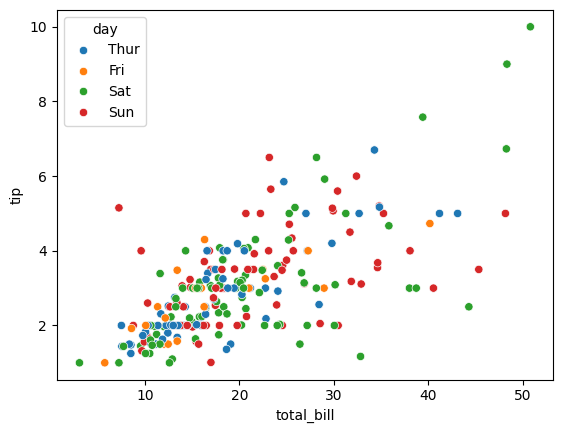

In [43]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'day')

## Barplot

<Axes: xlabel='sex', ylabel='tip'>

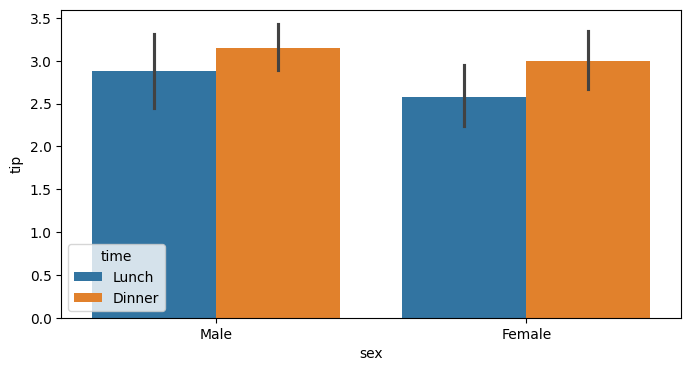

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(data = df, x = 'sex', y = 'tip', hue = 'time')

## Use correlation heatmap

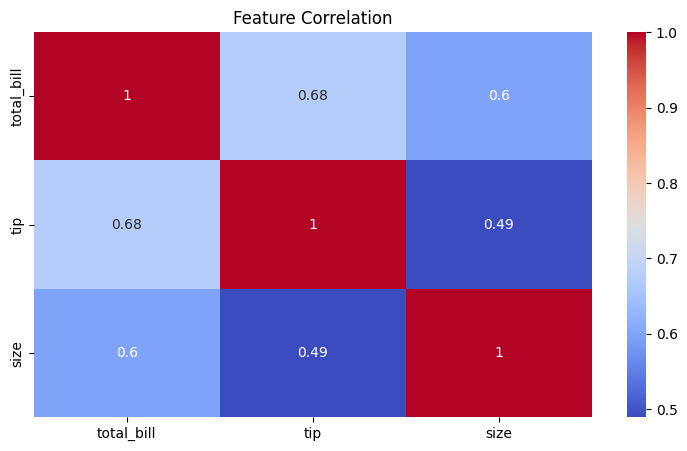

In [45]:
plt.figure(figsize=(9,5))
sns.heatmap(df[['total_bill', 'tip', 'size']].corr(), annot=True, cmap = 'coolwarm')
plt.title('Feature Correlation')
plt.show()

## 4. Multiple Linear Regression Model 

In [46]:
# Feature selection
X = df[['total_bill', 'size']]
y = df['tip']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)


# Convert scaled data back to original
X_test_original = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=X.columns) 

# inverse_transform()	Convert scaled → original units
# pd.DataFrame(..., columns=X.columns):	Restore column names
# results_df['predicted'] = ...	Combine features + prediction for evaluation/plotting

# Combine into one DataFrame for analysis or plotting
results_df = X_test_original.copy()
results_df['actual_tip'] = y_test.values
results_df['predicted_tip'] = y_pred

# model evalution
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MSE: 0.65
RMSE: 0.81
MAE: 0.66
R2: 0.48


In [74]:
import plotly.express as px
import plotly.graph_objects as go

# Refit model on unscaled data for easy interpretation
model_3d = LinearRegression()
model_3d.fit(X_train, y_train)

# Create a meshgrid for the regression plane
x_range = np.linspace(X['total_bill'].min(), X['total_bill'].max(), 50)
y_range = np.linspace(X['size'].min(), X['size'].max(), 50)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = model_3d.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()]).reshape(x_mesh.shape)

# Use plotly express for 3D scatter
fig = px.scatter_3d(
    df, x='total_bill', y='size', z='tip',
    color='tip', opacity=0.7,
    title='3D Scatter Plot with Regression Plane (Plotly Express)'
)

# Add regression plane using go.Surface
fig.add_trace(
    go.Surface(
        x=x_range,
        y=y_range,
        z=z_mesh,
        colorscale='Viridis',
        opacity=0.5,
        name='Regression Plane',
        showscale=False
    )
)

# Update axes labels
fig.update_layout(
    scene=dict(
        xaxis_title='Total Bill',
        yaxis_title='Size',
        zaxis_title='Tip'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()


c:\Users\Usman Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## Polynomial Multiple Linear Regression

In [48]:
X = df[['total_bill', 'size']]
y = df[['tip']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# model
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# prediction
y_pred_poly = poly_model.predict(X_test_poly)
# Model Evalution
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"MSE: {mse: .2f}")
print(f"RMSE: {rmse: .2f}")
print(f"MAE: {mae: .2f}")
print(f"R2 Score: {r2: .2f}")



MSE:  0.76
RMSE:  0.87
MAE:  0.71
R2 Score:  0.39


In [49]:
import plotly.express as px
import plotly.graph_objects as go

# Create test DataFrame for plotting
df_test_poly = pd.DataFrame(X_test_scaled, columns=['total_bill_scaled', 'size_scaled'])
df_test_poly['tip'] = y_test.values
df_test_poly['y_pred'] = y_pred_poly

# Create meshgrid for the two scaled features
x_range = np.linspace(X_test_scaled[:, 0].min(), X_test_scaled[:, 0].max(), 50)
y_range = np.linspace(X_test_scaled[:, 1].min(), X_test_scaled[:, 1].max(), 50)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Flatten meshgrid, transform to polynomial features, and predict
grid_scaled = np.c_[x_mesh.ravel(), y_mesh.ravel()]
grid_poly = poly.transform(grid_scaled)
z_mesh = poly_model.predict(grid_poly).reshape(x_mesh.shape)

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_test_poly,
    x='total_bill_scaled',
    y='size_scaled',
    z='tip',
    color='tip',
    title='3D Polynomial Regression (Scaled Data)',
    opacity=0.7
)

# Add the polynomial regression surface
fig.add_trace(
    go.Surface(
        x=x_range,
        y=y_range,
        z=z_mesh,
        colorscale='Viridis',
        opacity=0.6,
        name='Polynomial Regression Surface',
        showscale=False
    )
)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Total Bill (scaled)',
        yaxis_title='Size (scaled)',
        zaxis_title='Tip'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()


In [50]:
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures

# Refit linear model on unscaled data
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)

# Fit polynomial model on unscaled data
poly_unscaled = PolynomialFeatures(degree=2)
X_train_poly_orig = poly_unscaled.fit_transform(X_train)
X_test_poly_orig = poly_unscaled.transform(X_test)
model_poly_unscaled = LinearRegression()
model_poly_unscaled.fit(X_train_poly_orig, y_train)

# Create meshgrid in original feature space
x_range = np.linspace(X['total_bill'].min(), X['total_bill'].max(), 50)
y_range = np.linspace(X['size'].min(), X['size'].max(), 50)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Flatten mesh and make predictions
grid_orig = np.c_[x_mesh.ravel(), y_mesh.ravel()]
z_linear = model_unscaled.predict(grid_orig).reshape(x_mesh.shape)
z_poly = model_poly_unscaled.predict(poly_unscaled.transform(grid_orig)).reshape(x_mesh.shape)

# Plot
fig = go.Figure()

# 🟦 Training data
fig.add_trace(go.Scatter3d(
    x=X_train['total_bill'],
    y=X_train['size'],
    z=y_train['tip'],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Train Data'
))

# 🟩 Testing data
fig.add_trace(go.Scatter3d(
    x=X_test['total_bill'],
    y=X_test['size'],
    z=y_test['tip'],
    mode='markers',
    marker=dict(size=4, color='green'),
    name='Test Data'
))

# 🔴 Linear Regression Plane
fig.add_trace(go.Surface(
    x=x_range,
    y=y_range,
    z=z_linear,
    colorscale='Reds',
    opacity=0.5,
    name='Linear Regression Plane',
    showscale=False
))

# 🟣 Polynomial Regression Surface
fig.add_trace(go.Surface(
    x=x_range,
    y=y_range,
    z=z_poly,
    colorscale='Viridis',
    opacity=0.5,
    name='Polynomial Regression Surface',
    showscale=False
))

# Layout
fig.update_layout(
    title='3D Regression Comparison (Original Data)',
    scene=dict(
        xaxis_title='Total Bill ($)',
        yaxis_title='Size (People)',
        zaxis_title='Tip ($)'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(
        title='Legend',
        x=0.01,
        y=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1
    )
)

fig.show()


c:\Users\Usman Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Usman Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

